In [23]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

import numpy as np
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from cmdstanpy import CmdStanModel
from logging import getLogger

stan_logger = getLogger("cmdstanpy")
stan_logger.disabled = True

from pandas import read_csv

In [2]:
stan_model = CmdStanModel(stan_file="../../stan/hmm-eam.stan")

In [3]:
def configure_data(path):
    df = read_csv(path)
    df = np.array(df)
    df = df[:400,...]

    rts = df[:,1:2].astype(np.float32)
    choice = np.abs(df[:,2]-3)

    output = {
        "stan_inputs": {
            "n_obs": len(rts),
            "y": [(int(c), r) for c, r in zip(choice, rts[:,0])]
        },
        "rt": rts[:,0],
        "choice": choice
    }
    return output

In [4]:
stan_fits = {}
file_names = sorted(os.listdir(os.path.join('dutilh-resources', 'data')))

for file in file_names:
    subject = os.path.splitext(file)[0]
    print(subject)
    path = os.path.join('dutilh-resources', 'data', file)

    df = configure_data(path)


    fit = stan_model.sample(df['stan_inputs'], adapt_delta=0.99, show_progress=False, inits=0)
    print(fit.diagnose())

    stan_fits[subject] = fit


subject-a
Processing csv files: /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmpama2f_k6/hmm-eamdtxan4ue/hmm-eam-20240823131325_1.csv, /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmpama2f_k6/hmm-eamdtxan4ue/hmm-eam-20240823131325_2.csv, /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmpama2f_k6/hmm-eamdtxan4ue/hmm-eam-20240823131325_3.csv, /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmpama2f_k6/hmm-eamdtxan4ue/hmm-eam-20240823131325_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.

subject-b
Processing csv files: /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmpama2f_k6/hmm-eamcbgzrpdc/hmm-eam-20240823131517_1.csv, /var/folders/vn/tvq3_rgx6

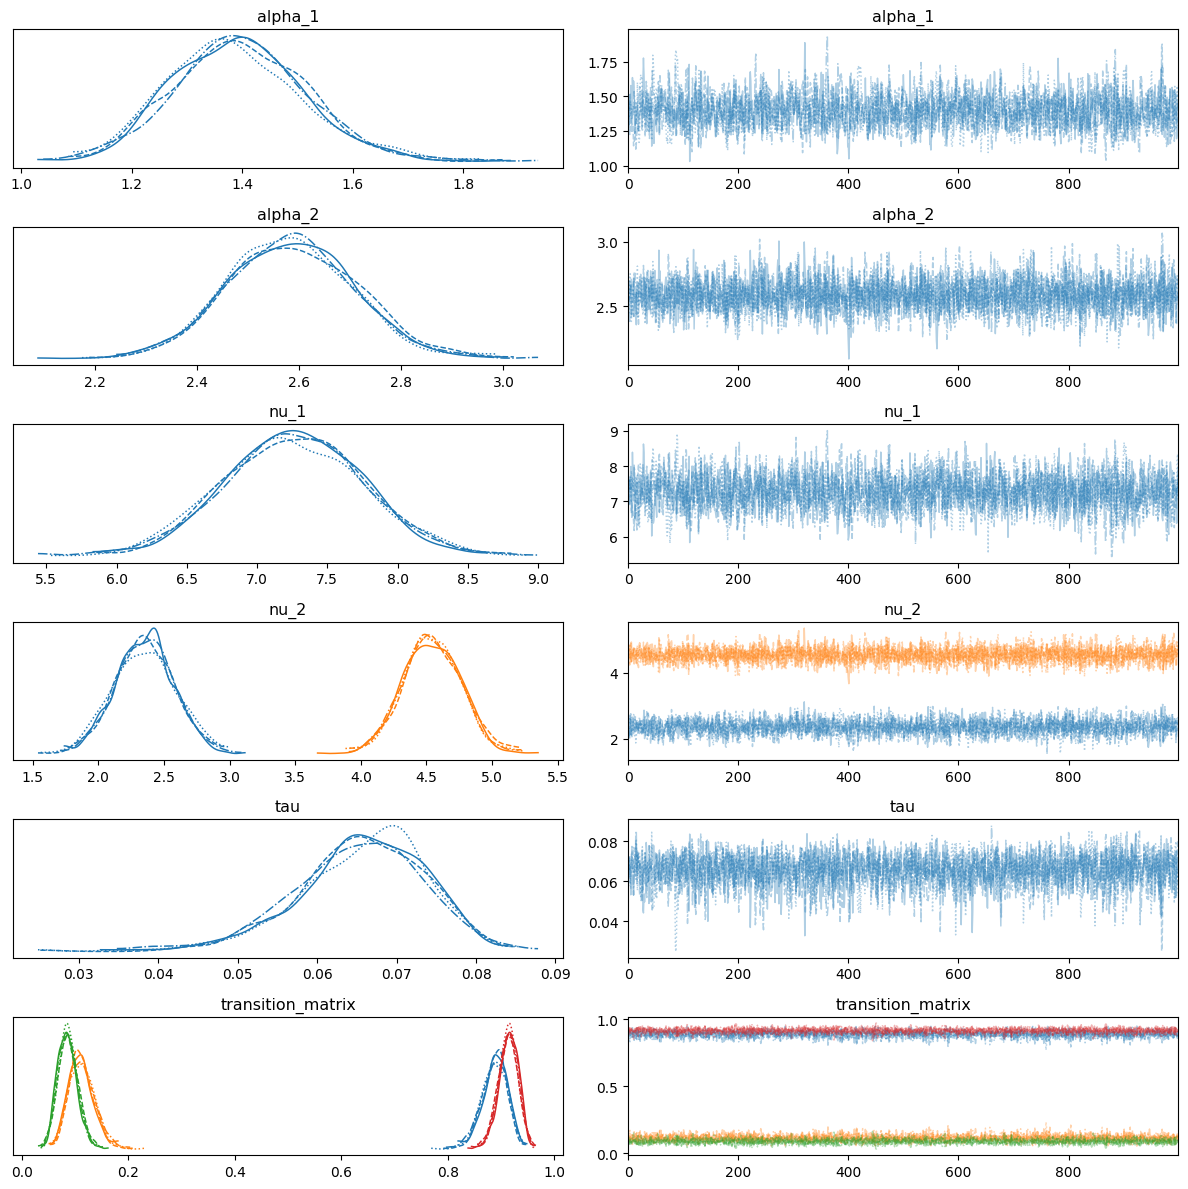

In [5]:
f = az.plot_trace(stan_fits['subject-a'], var_names=['alpha_1', 'alpha_2', 'nu_1', 'nu_2', 'tau', 'transition_matrix'])
plt.tight_layout()

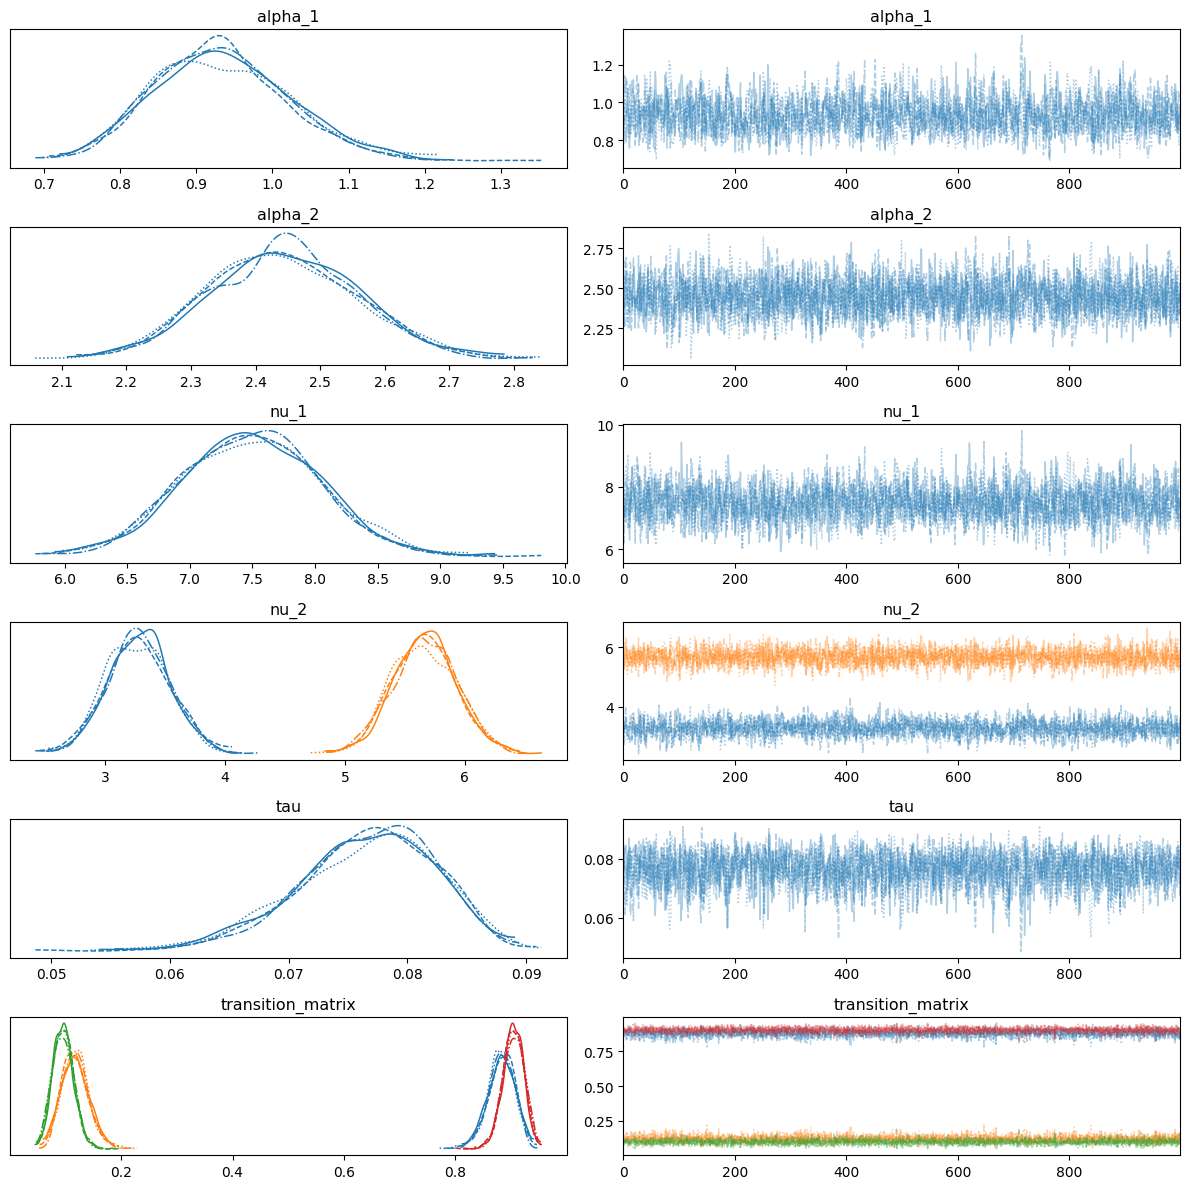

In [6]:
f = az.plot_trace(stan_fits['subject-d'], var_names=['alpha_1', 'alpha_2', 'nu_1', 'nu_2', 'tau', 'transition_matrix'])
plt.tight_layout()

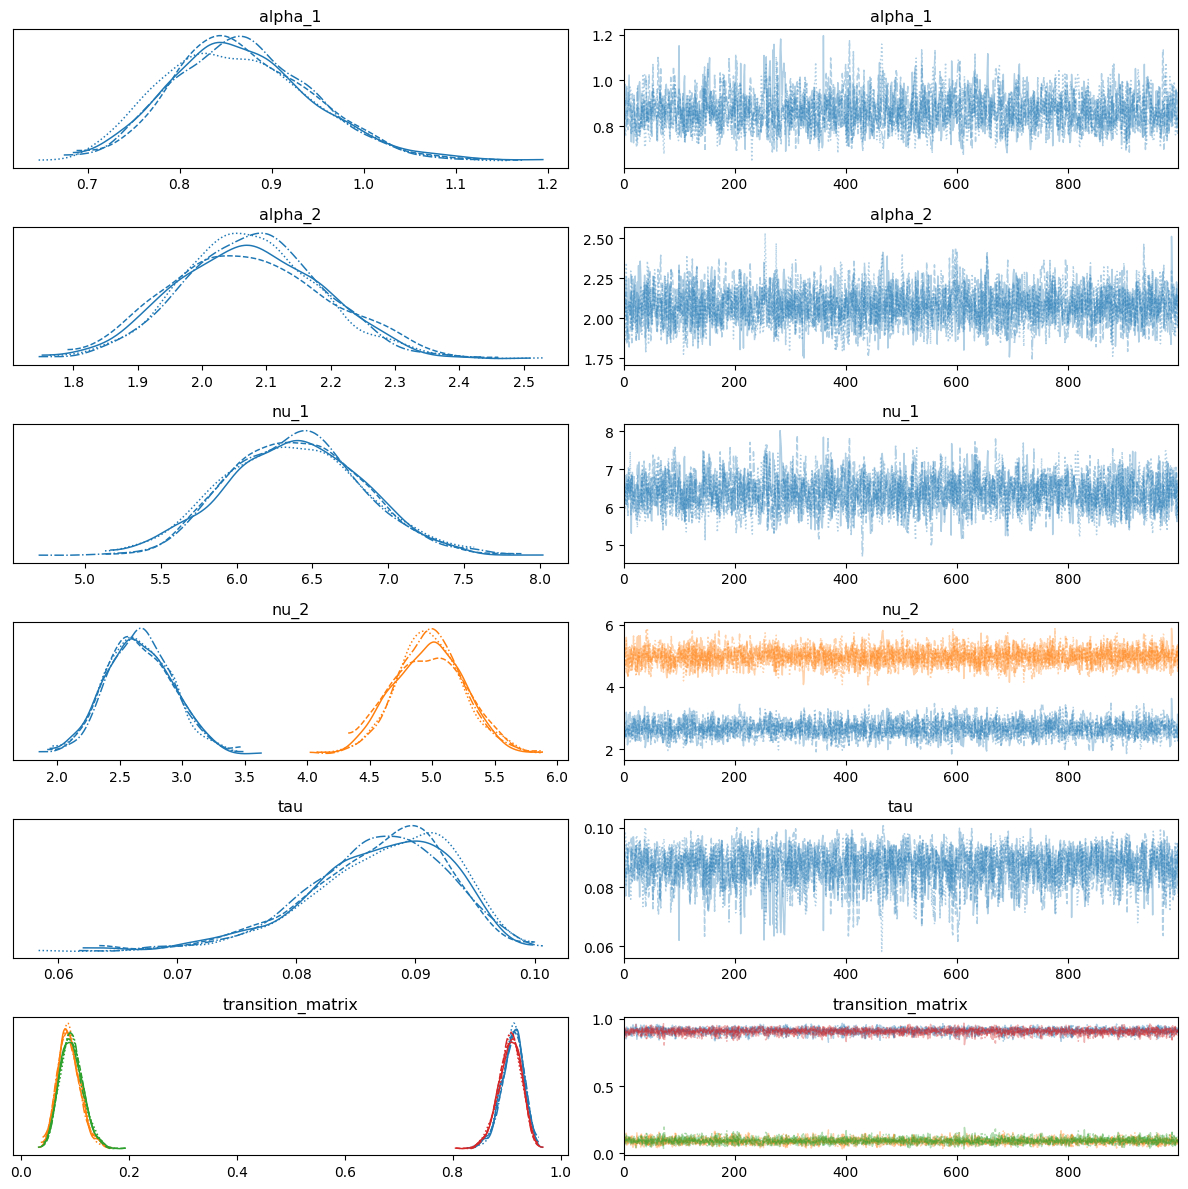

In [7]:
f = az.plot_trace(stan_fits['subject-k'], var_names=['alpha_1', 'alpha_2', 'nu_1', 'nu_2', 'tau', 'transition_matrix'])
plt.tight_layout()

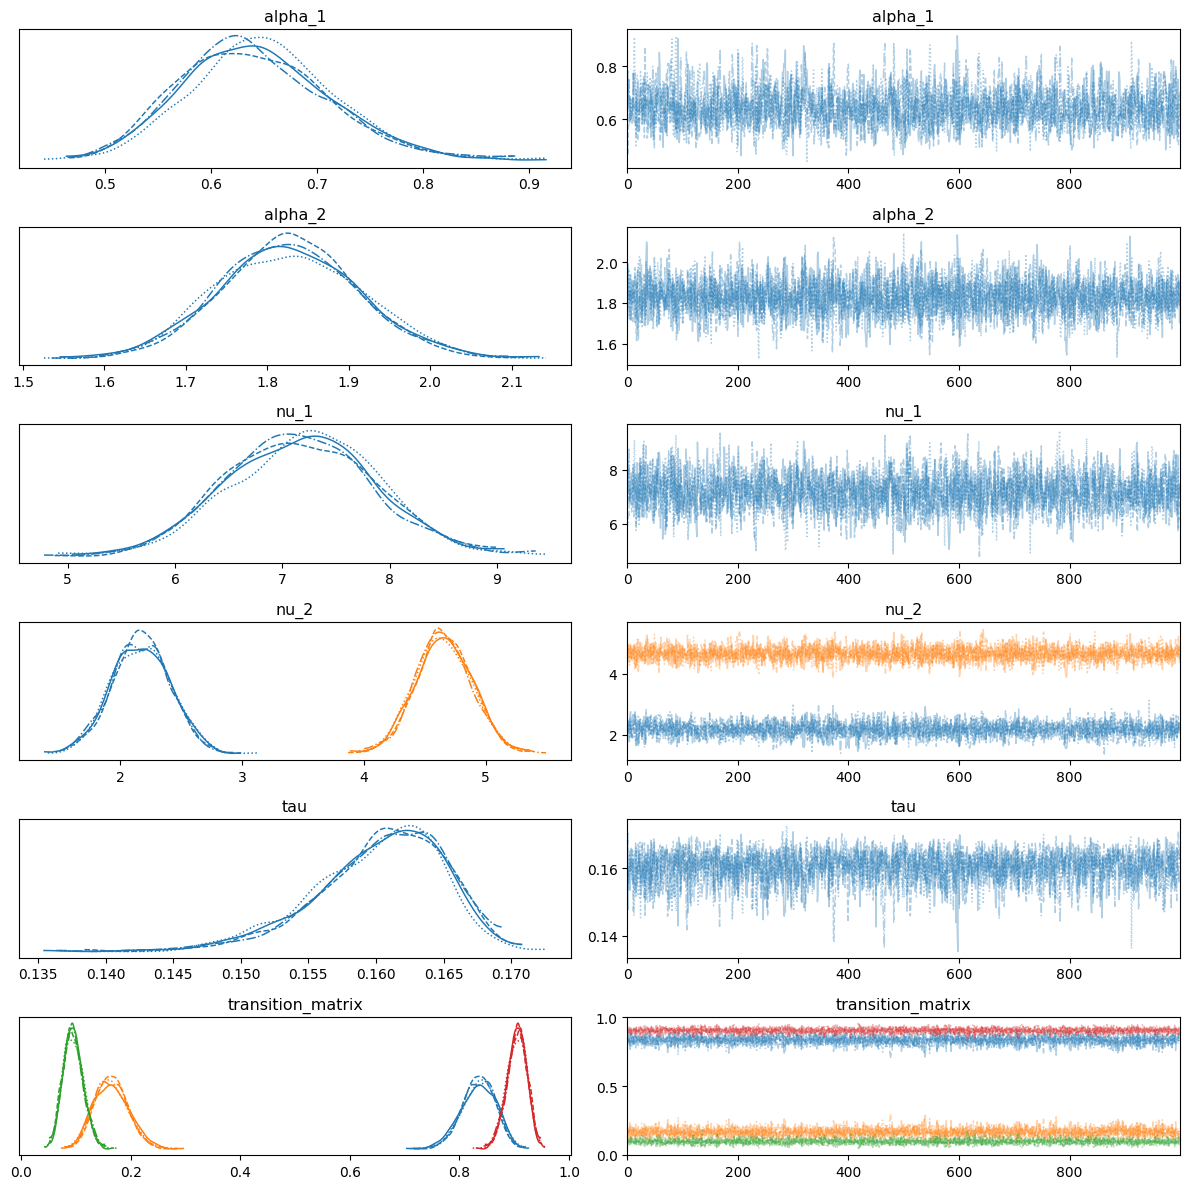

In [8]:
f = az.plot_trace(stan_fits['subject-b'], var_names=['alpha_1', 'alpha_2', 'nu_1', 'nu_2', 'tau', 'transition_matrix'])
plt.tight_layout()

In [9]:
pars = ["transition_matrix[1,1]", "transition_matrix[2,2]", "alpha_1", "alpha_2", "nu_1", "nu_2[1]", "nu_2[2]", "tau"]
summaries = {}
for subject, fit in stan_fits.items():
    print(subject)
    summary = fit.summary()
    summaries[subject] = summary.loc[pars]

subject-a
subject-b
subject-c
subject-d
subject-e
subject-f
subject-g
subject-h
subject-i
subject-j
subject-k


In [10]:
summary = pd.concat(summaries.values(), ignore_index=False)

In [11]:
summary.loc['alpha_1']

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha_1,1.393980,0.002710,0.120160,1.209300,1.389200,1.596240,1966.065880,11.161820,1.000300
alpha_1,0.644420,0.001640,0.071320,0.536920,0.638780,0.768690,1882.428000,13.179040,1.001640
alpha_1,0.986626,0.002986,0.125188,0.801010,0.977346,1.206620,1757.841156,11.121635,1.003339
alpha_1,0.933800,0.002156,0.090104,0.794980,0.929022,1.090630,1746.068132,10.958816,1.001584
alpha_1,0.876459,0.001977,0.085558,0.745059,0.868988,1.026140,1873.045844,12.571621,1.000305
alpha_1,0.617230,0.002330,0.088770,0.492750,0.606080,0.779730,1449.961120,8.320630,1.000540
alpha_1,1.143652,0.002799,0.110333,0.971747,1.135620,1.332850,1554.204133,10.971679,1.002673
alpha_1,0.357283,0.001100,0.043951,0.294383,0.352348,0.435295,1597.266229,15.527791,1.001766
alpha_1,0.476442,0.001520,0.062099,0.387159,0.470359,0.591622,1668.900402,13.398043,1.000611
alpha_1,0.472710,0.001370,0.057370,0.387990,0.467460,0.577260,1755.045540,13.621160,1.002730


In [12]:
summary.loc['alpha_2']

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha_2,2.584880,0.002130,0.124920,2.38826,2.58308,2.78727,3453.989040,19.609120,1.000670
alpha_2,1.827211,0.001571,0.086622,1.69012,1.82646,1.97148,3039.235014,21.277943,0.999274
alpha_2,2.435830,0.002670,0.144750,2.20626,2.43091,2.68374,2933.935200,18.562630,1.001610
alpha_2,2.443048,0.002136,0.113911,2.26182,2.44018,2.63138,2843.967135,17.849540,0.999864
alpha_2,2.247930,0.002800,0.138900,2.02460,2.24540,2.47838,2458.429120,16.500630,1.001050
alpha_2,1.789510,0.002610,0.121230,1.60481,1.78558,1.99545,2164.648340,12.421870,1.000300
alpha_2,2.020019,0.002432,0.126972,1.82180,2.01369,2.23836,2725.992891,19.243752,1.000451
alpha_2,1.629030,0.001430,0.077720,1.50282,1.62834,1.75931,2947.227300,28.651410,1.001070
alpha_2,1.653830,0.002010,0.104730,1.48879,1.64732,1.83376,2719.675270,21.833730,1.000130
alpha_2,1.588150,0.001500,0.080160,1.46075,1.58558,1.72174,2863.864060,22.226860,1.002030


In [13]:
summary.loc['nu_1']

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
nu_1,7.261430,0.010580,0.494060,6.45710,7.25603,8.08447,2182.587840,12.391070,0.999750
nu_1,7.178850,0.014290,0.684800,6.06621,7.18564,8.31202,2295.672310,16.072200,1.000760
nu_1,5.473739,0.011985,0.542877,4.58221,5.46496,6.38097,2051.921307,12.982242,1.001661
nu_1,7.489773,0.012091,0.548008,6.60157,7.49248,8.40317,2054.190286,12.892677,1.001022
nu_1,6.087865,0.011441,0.517782,5.26203,6.08605,6.95226,2048.035043,13.746124,1.000124
nu_1,5.532920,0.013450,0.544320,4.67232,5.52051,6.44656,1638.225340,9.400990,0.999850
nu_1,5.821823,0.013483,0.555775,4.87593,5.83120,6.73218,1699.031069,11.994064,1.002281
nu_1,4.889106,0.014195,0.612181,3.91457,4.89122,5.92805,1859.844475,18.080440,1.001706
nu_1,4.448388,0.009955,0.439555,3.74624,4.43871,5.19248,1949.470674,15.650479,1.000799
nu_1,5.625280,0.013220,0.594280,4.69070,5.59848,6.65541,2019.648330,15.674780,1.000740


In [14]:
summary.loc['nu_2[1]']

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
nu_2[1],2.35298,0.004037,0.228063,1.96987,2.35627,2.72928,3191.31,18.1178,1.000850
nu_2[1],2.17184,0.004428,0.238856,1.77467,2.16912,2.56764,2909.23,20.3678,0.999735
nu_2[1],2.65849,0.004883,0.263977,2.22631,2.65766,3.09589,2921.97,18.4869,1.001140
nu_2[1],3.27528,0.005346,0.263973,2.84581,3.27468,3.71391,2438.34,15.3037,1.001130
nu_2[1],3.00655,0.005804,0.294255,2.52557,3.00741,3.48444,2570.15,17.2505,1.000940
nu_2[1],2.28369,0.005662,0.289540,1.81901,2.28076,2.76239,2615.46,15.0088,1.000620
nu_2[1],2.89568,0.005018,0.258194,2.46757,2.89363,3.32244,2647.84,18.6920,1.001450
nu_2[1],1.92016,0.003795,0.194130,1.61373,1.92038,2.23476,2616.98,25.4409,0.999936
nu_2[1],2.09741,0.004332,0.225792,1.73012,2.09312,2.47235,2716.60,21.8091,1.000340
nu_2[1],2.76426,0.004678,0.235633,2.37483,2.76200,3.15691,2536.84,19.6888,1.000990


In [15]:
summary.loc['nu_2[2]']

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
nu_2[2],4.54312,0.003816,0.220656,4.18713,4.53685,4.90112,3344.42,18.9870,1.000430
nu_2[2],4.65640,0.004069,0.232076,4.28245,4.65068,5.03894,3253.18,22.7758,0.999588
nu_2[2],4.98302,0.004702,0.271274,4.53599,4.98121,5.43631,3328.55,21.0593,1.000320
nu_2[2],5.66410,0.004866,0.266814,5.23748,5.66131,6.10777,3007.04,18.8730,0.999674
nu_2[2],5.57380,0.006507,0.328558,5.03875,5.57949,6.10743,2549.42,17.1114,1.000300
nu_2[2],4.65050,0.006079,0.302704,4.15801,4.64465,5.16028,2479.23,14.2271,1.000140
nu_2[2],4.62909,0.005462,0.287813,4.17570,4.61894,5.11571,2776.85,19.6028,0.999791
nu_2[2],3.64855,0.003608,0.198888,3.32383,3.64778,3.97057,3039.27,29.5462,1.001990
nu_2[2],3.66770,0.004467,0.240895,3.28179,3.66175,4.07820,2907.99,23.3456,1.000290
nu_2[2],4.48148,0.004419,0.244526,4.07762,4.48243,4.88402,3061.76,23.7627,1.001060


In [16]:
summary.loc['tau']

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
tau,0.065520,0.000160,0.008110,0.051170,0.066120,0.077500,2569.765080,14.589170,1.000310
tau,0.160290,0.000110,0.004720,0.151520,0.160890,0.166880,2005.746960,14.042410,1.000690
tau,0.099589,0.000253,0.011494,0.078573,0.100663,0.116422,2062.267080,13.047699,1.003429
tau,0.076488,0.000124,0.005882,0.065904,0.077053,0.085045,2268.251356,14.236185,1.001054
tau,0.122293,0.000141,0.006843,0.109892,0.123062,0.132209,2341.029225,15.712660,1.000167
tau,0.168320,0.000200,0.007830,0.153610,0.169400,0.178960,1597.994520,9.170120,1.000290
tau,0.098073,0.000201,0.008913,0.081653,0.099279,0.110838,1974.415279,13.938098,1.001381
tau,0.147924,0.000082,0.003502,0.141300,0.148499,0.152428,1839.177352,17.879525,1.001211
tau,0.135394,0.000143,0.006177,0.123434,0.136257,0.144025,1860.091797,14.932940,1.000099
tau,0.141490,0.000100,0.004530,0.133510,0.142130,0.147790,2053.533250,15.937770,1.003250


In [26]:
for subject, fit in stan_fits.items():
    print(subject)

    path = os.path.join('dutilh-resources', 'stan-fits', subject)
    with open(path + '.pkl', 'wb') as f:
        pickle.dump(fit, f)

subject-a
subject-b
subject-c
subject-d
subject-e
subject-f
subject-g
subject-h
subject-i
subject-j
subject-k
